In [1]:
# CCA--> Complete case analysis

# df---> missing data---> filter missing data
# new_df---> filtered_coulmns_in_which_we_have_missing_value


# new_df--->missing_data_drop


# Architecture--->Histogram__>
# past column in which we have missing data
# updated column in which we have no missing data

# if past data architecture is overlap to new data architecture ---> it means we can drop missing data.
# if past data architecture is not overlap to new data architecture ---> it means we can not drop missing data.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\dsjob.csv")

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [6]:
cols=[var for var in df.columns if df[var].isnull().mean()< 0.05  and df[var].isnull().mean()>0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [7]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
431,no_enrollment,Graduate,11,1
454,Full time course,Graduate,9,never
2078,Part time course,High School,1,1
1790,no_enrollment,Masters,>20,>4
19,Full time course,NaN,2,never


In [8]:
df['education_level'].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [9]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [10]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((2129, 13), (2018, 4))

In [11]:
import matplotlib .pyplot as plt

<Axes: >

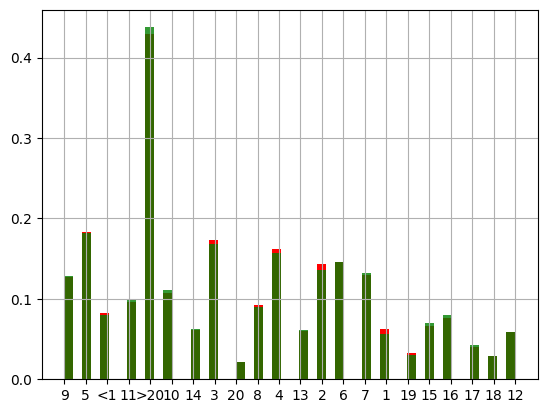

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['experience'].hist(bins=50, ax=ax, density =True , color='red')


#data after cca, the argument alpha makes the color transparent, so we can
# see the pverlap of the 2 distribution
new_df['experience'].hist(bins=50, ax=ax, density =True , color='green', alpha=0.8)


In [13]:
temp=pd.concat([
    #percentage of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),

    #percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
               
],axis=1)

#add column names
temp.columns=['orginal','cca']
temp

,orginal,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


In [14]:
temp=pd.concat([
    #percentage of observations per category, original data
    df['education_level'].value_counts()/len(df),

    #percentage of observations per category, cca data
    new_df['education_level'].value_counts()/len(new_df)
               
],axis=1)

#add column names
temp.columns=['orginal','cca']
temp

,orginal,cca
education_level,,
Graduate,0.596054,0.611497
Masters,0.232973,0.239346
High School,0.104274,0.106541
Phd,0.025364,0.026264
Primary School,0.016909,0.016353


In [15]:
temp=pd.concat([
    #percentage of observations per category, original data
    df['experience'].value_counts()/len(df),

    #percentage of observations per category, cca data
    new_df['experience'].value_counts()/len(new_df)
               
],axis=1)

#add column names
temp.columns=['orginal','cca']
temp

,orginal,cca
experience,,
>20,0.179897,0.183845
5,0.076562,0.076313
3,0.072334,0.070862
4,0.068107,0.065907
6,0.061062,0.061447
2,0.060122,0.056987
7,0.054486,0.055500
9,0.053077,0.054014
10,0.045092,0.046581


In [16]:
temp=pd.concat([
    #percentage of observations per category, original data
    df['last_new_job'].value_counts()/len(df),

    #percentage of observations per category, cca data
    new_df['last_new_job'].value_counts()/len(new_df)
               
],axis=1)

#add column names
temp.columns=['orginal','cca']
temp

,orginal,cca
last_new_job,,
1,0.415218,0.426660
>4,0.165806,0.170961
2,0.160639,0.162537
never,0.121184,0.116452
3,0.062471,0.065411
4,0.055895,0.057978


# dataset 2. Covid_toy

In [17]:
df=pd.read_csv(r"D:\Python\Data set\covid_toy.csv")
df.head(3)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No


In [19]:
df.isnull().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [20]:
cols=[var for var in df.columns if df[var].isnull().mean()< 0.2  and df[var].isnull().mean()>0]
cols

['fever']

In [21]:
len(df[cols].dropna())/len(df)

0.9

In [22]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((100, 6), (90, 1))

<Axes: >

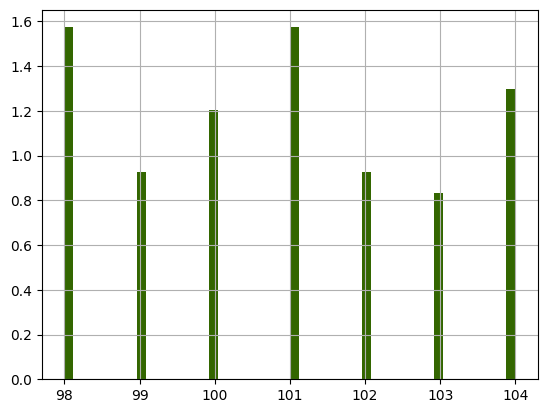

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['fever'].hist(bins=50, ax=ax, density =True , color='red')


#data after cca, the argument alpha makes the color transparent, so we can
# see the pverlap of the 2 distribution
new_df['fever'].hist(bins=50, ax=ax, density =True , color='green', alpha=0.8)
